In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

clean_movie_data = pd.read_csv("clean_movie_data.csv")

clean_movie_data.describe()

,Year,Duration (min),Rating,Metascore
count,6404.000000,6404.000000,6404.000000,6404.000000
mean,2006.289975,110.068395,6.548782,57.363991
std,18.284315,19.477238,0.938561,17.629282
min,1929.000000,55.000000,1.900000,1.000000
25%,1997.000000,97.000000,6.000000,45.000000
50%,2012.000000,107.000000,6.600000,57.000000
75%,2021.000000,119.000000,7.200000,70.000000
max,2025.000000,321.000000,9.300000,100.000000


In [3]:
#Grabbing our values of Certificate, Rating, & Metascore
rating_scores = clean_movie_data[["Certificate", "Rating", "Metascore"]]
rating_scores

,Certificate,Rating,Metascore
0,R,6.4,67.0
1,PG-13,7.3,66.0
2,PG-13,5.5,42.0
3,PG-13,7.3,73.0
4,R,7.7,82.0
...,...,...,...
6399,A,6.9,77.0
6400,R,6.8,64.0
6401,U,7.6,87.0
6402,U,6.5,76.0


In [37]:
#Converting to a dataframe
movie_data_df = pd.DataFrame(rating_scores)

#Calculating our average based on Cerificate Rating
average_rating = movie_data_df.groupby('Certificate')['Rating'].mean().reset_index()
average_rating_df = average_rating
average_rating_df

,Certificate,Rating
0,(Banned),6.570000
1,12,6.000000
2,12+,6.815385
3,13,6.452174
4,15+,6.424000
5,16,6.526667
6,16+,6.300000
7,18,6.457738
8,18+,4.550000
9,7,6.625000


In [39]:
#Calculating our average based on Metascore rating
average_metascore = movie_data_df.groupby('Certificate')["Metascore"].mean().reset_index()
average_metascore_df = average_metascore
average_metascore_df

,Certificate,Metascore
0,(Banned),62.400000
1,12,38.000000
2,12+,63.692308
3,13,57.710145
4,15+,54.400000
5,16,58.466667
6,16+,45.000000
7,18,59.279762
8,18+,56.500000
9,7,60.214286


In [ ]:
#Creating our Visualization and Graphs

([<matplotlib.axis.XTick at 0x1c5c4900ec0>,
 [Text(0, 0, '(Banned)'),
  Text(1, 0, '12'),
  Text(2, 0, '12+'),
  Text(3, 0, '13'),
  Text(4, 0, '15+'),
  Text(5, 0, '16'),
  Text(6, 0, '16+'),
  Text(7, 0, '18'),
  Text(8, 0, '18+'),
  Text(9, 0, '7'),
  Text(10, 0, 'A'),
  Text(11, 0, 'All'),
  Text(12, 0, 'G'),
  Text(13, 0, 'GP'),
  Text(14, 0, 'NC-17'),
  Text(15, 0, 'Not Rated'),
  Text(16, 0, 'PG'),
  Text(17, 0, 'PG-13'),
  Text(18, 0, 'R'),
  Text(19, 0, 'U'),
  Text(20, 0, 'U/A'),
  Text(21, 0, 'U/A 16+'),
  Text(22, 0, 'UA'),
  Text(23, 0, 'UA 13+'),
  Text(24, 0, 'UA 16+'),
  Text(25, 0, 'UA 7+'),
  Text(26, 0, 'Unrated')])

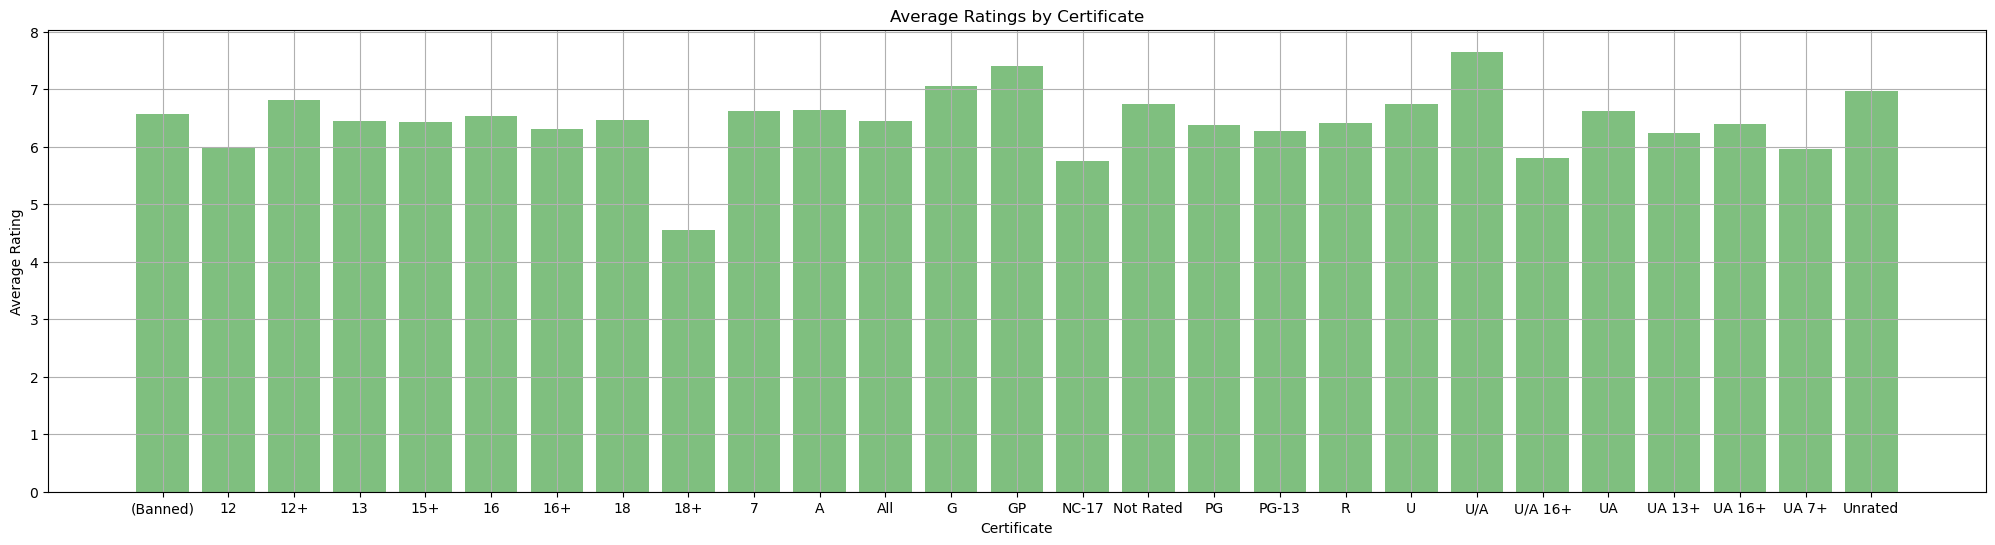

In [51]:
#Bar Graph Version
#Creating our x axis and our Tick locations
x_axis= np.arange(len(average_rating_df))
tick_locations = [value + 0.4 for value in x_axis]

#Creating the figure
plt.figure(figsize=(25,6))
plt.bar(x_axis, average_rating_df['Rating'], color = "Green", alpha = 0.5, align = "center")

#Creating our labels
plt.title("Average Ratings by Certificate")
plt.xlabel("Certificate")
plt.ylabel("Average Rating")
plt.grid()

# Setting the x-axis labels
plt.xticks(ticks=x_axis, labels=average_rating_df['Certificate'])


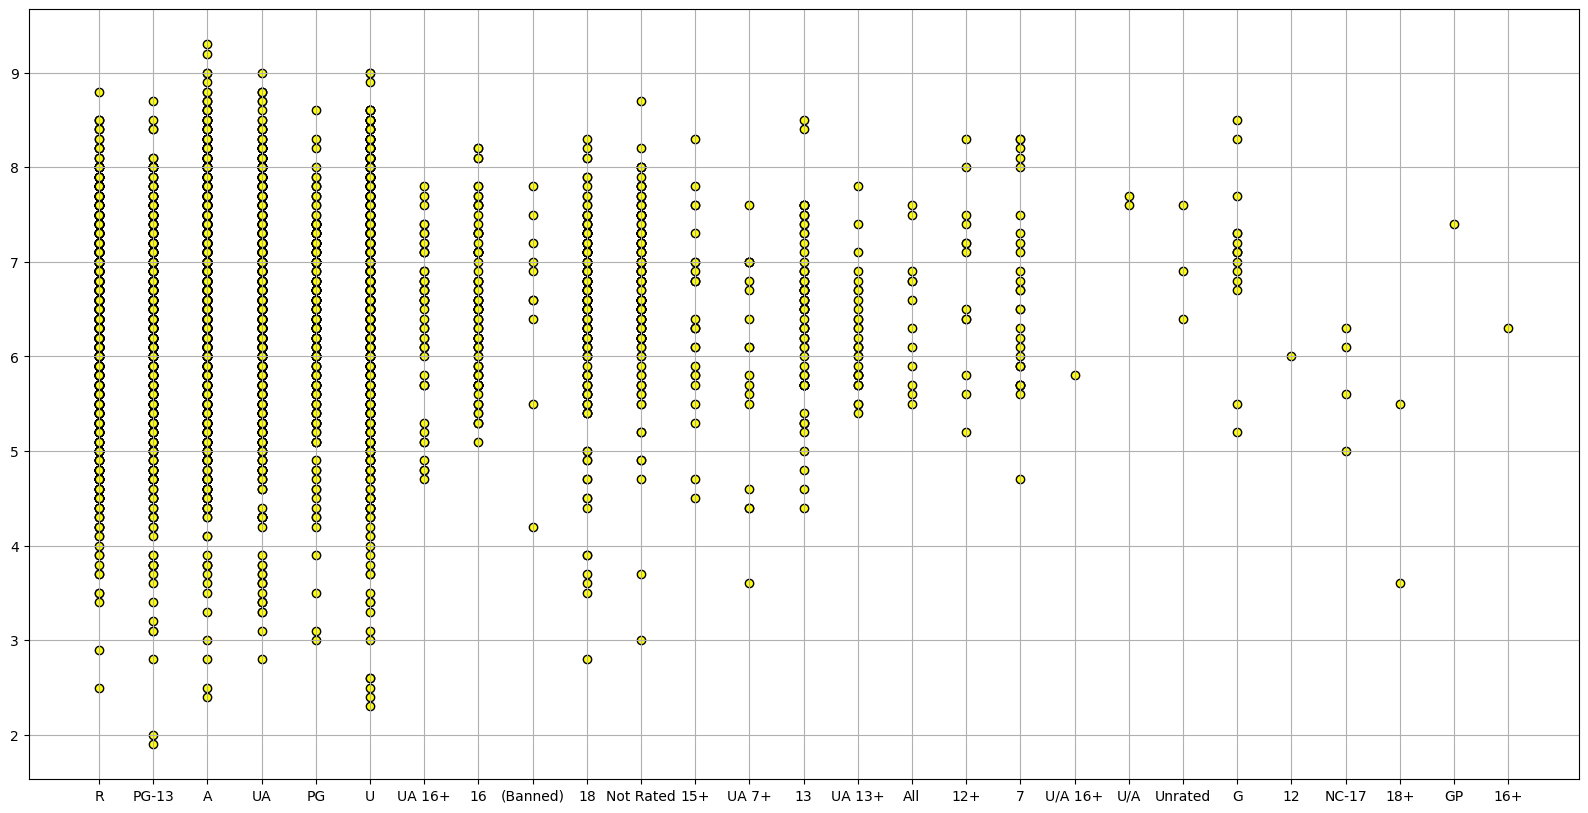

In [15]:
#Scatter Plot Version
x_axis = movie_data_df["Certificate"]
y_axis = movie_data_df["Rating"]

#Creating the figure size for Bargraph
plt.figure(figsize=(20,10))
plt.scatter(x_axis, y_axis, marker = "o", color = "yellow", edgecolors = "black")
plt.grid()

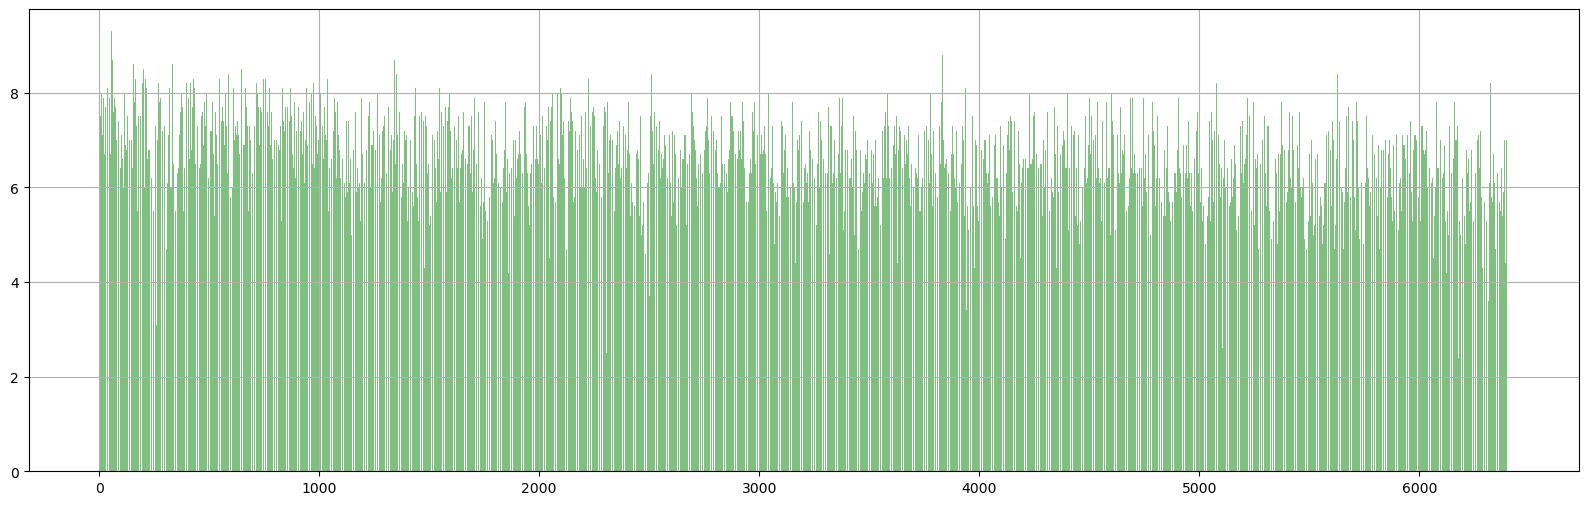

In [13]:
#Grass like Graph Blooper
#Creating our x axis and our Tick locations
x_axis= np.arange(len(movie_data_df))
tick_locations = [value + 0.4 for value in x_axis]

#Creating the figure size for Bargraph
plt.figure(figsize=(20,6))
plt.bar(x_axis, movie_data_df["Rating"], color = "Green", alpha = 0.5, align = "center")
plt.title
plt.grid()
